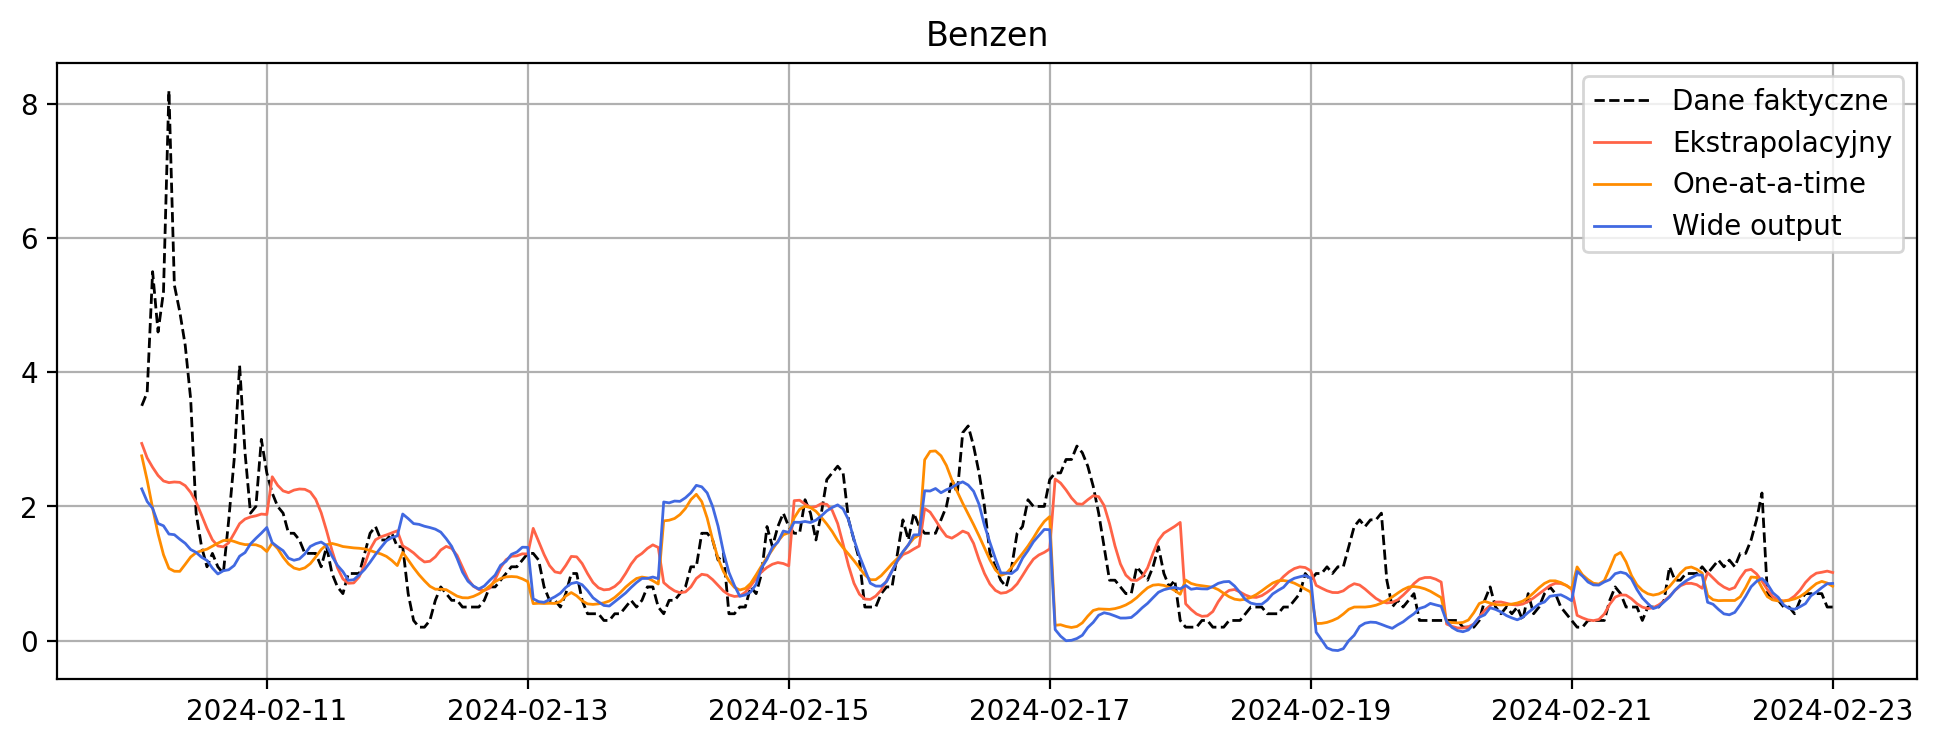

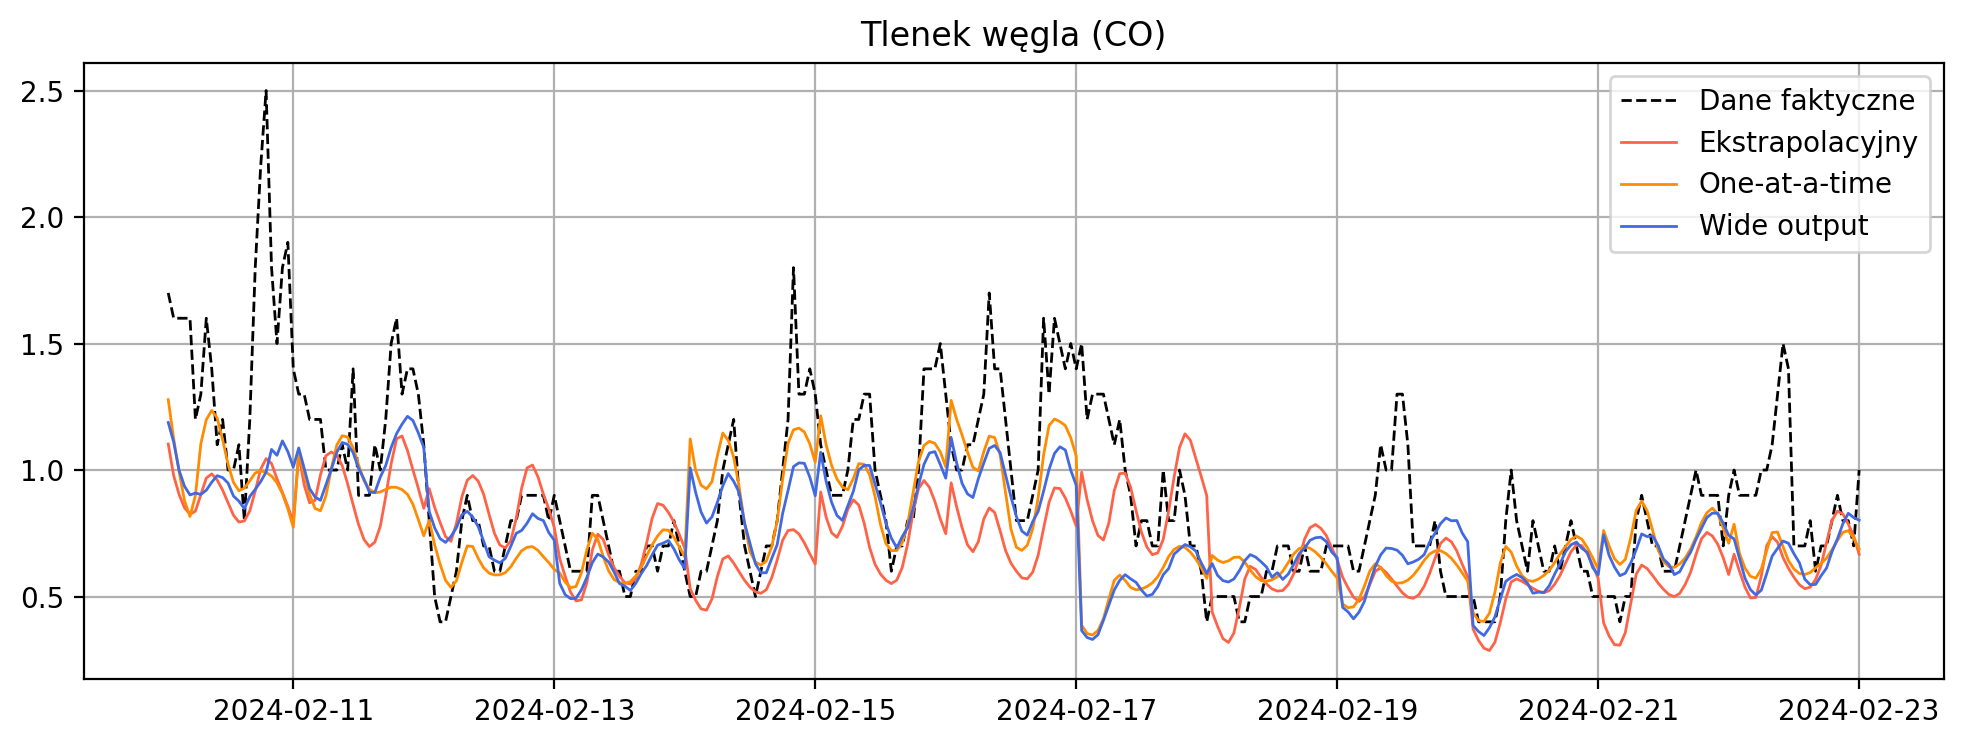

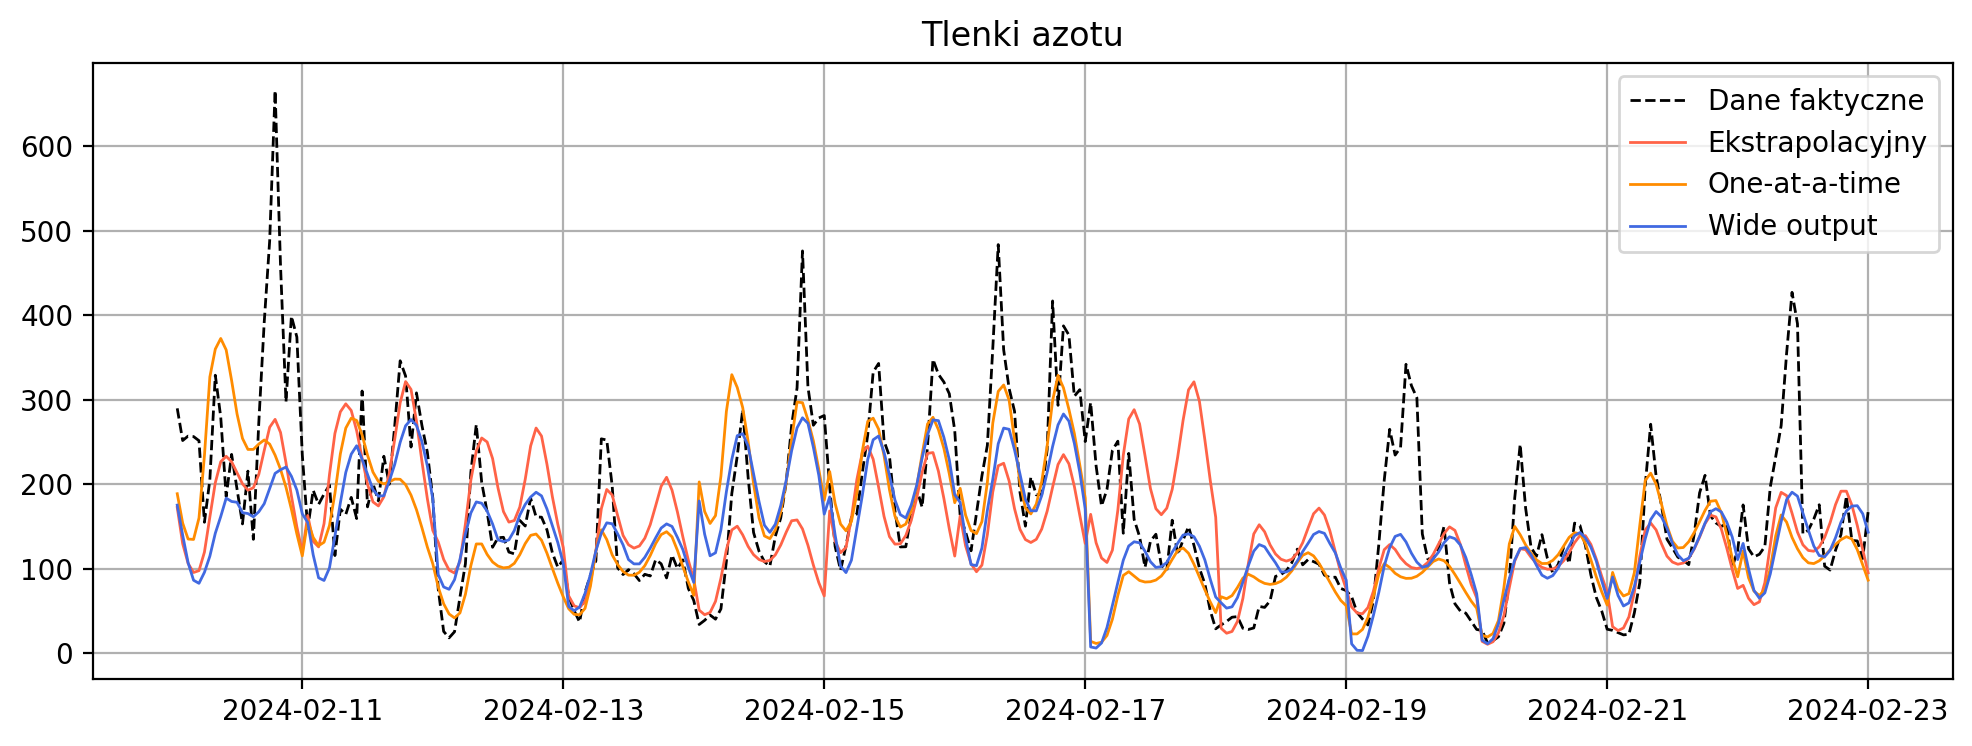

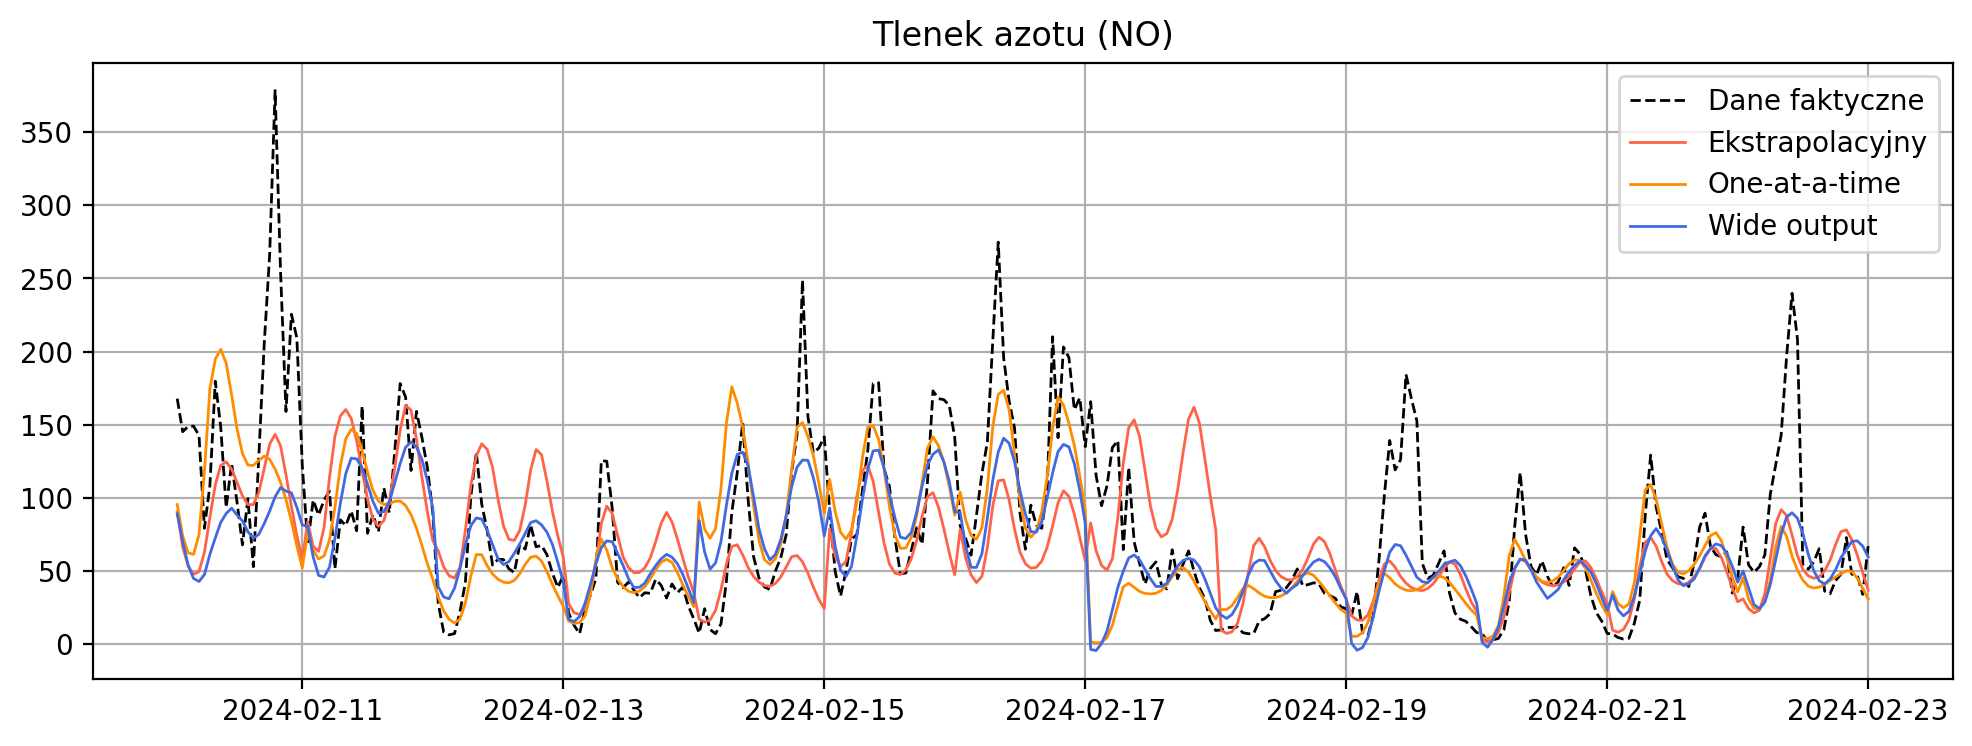

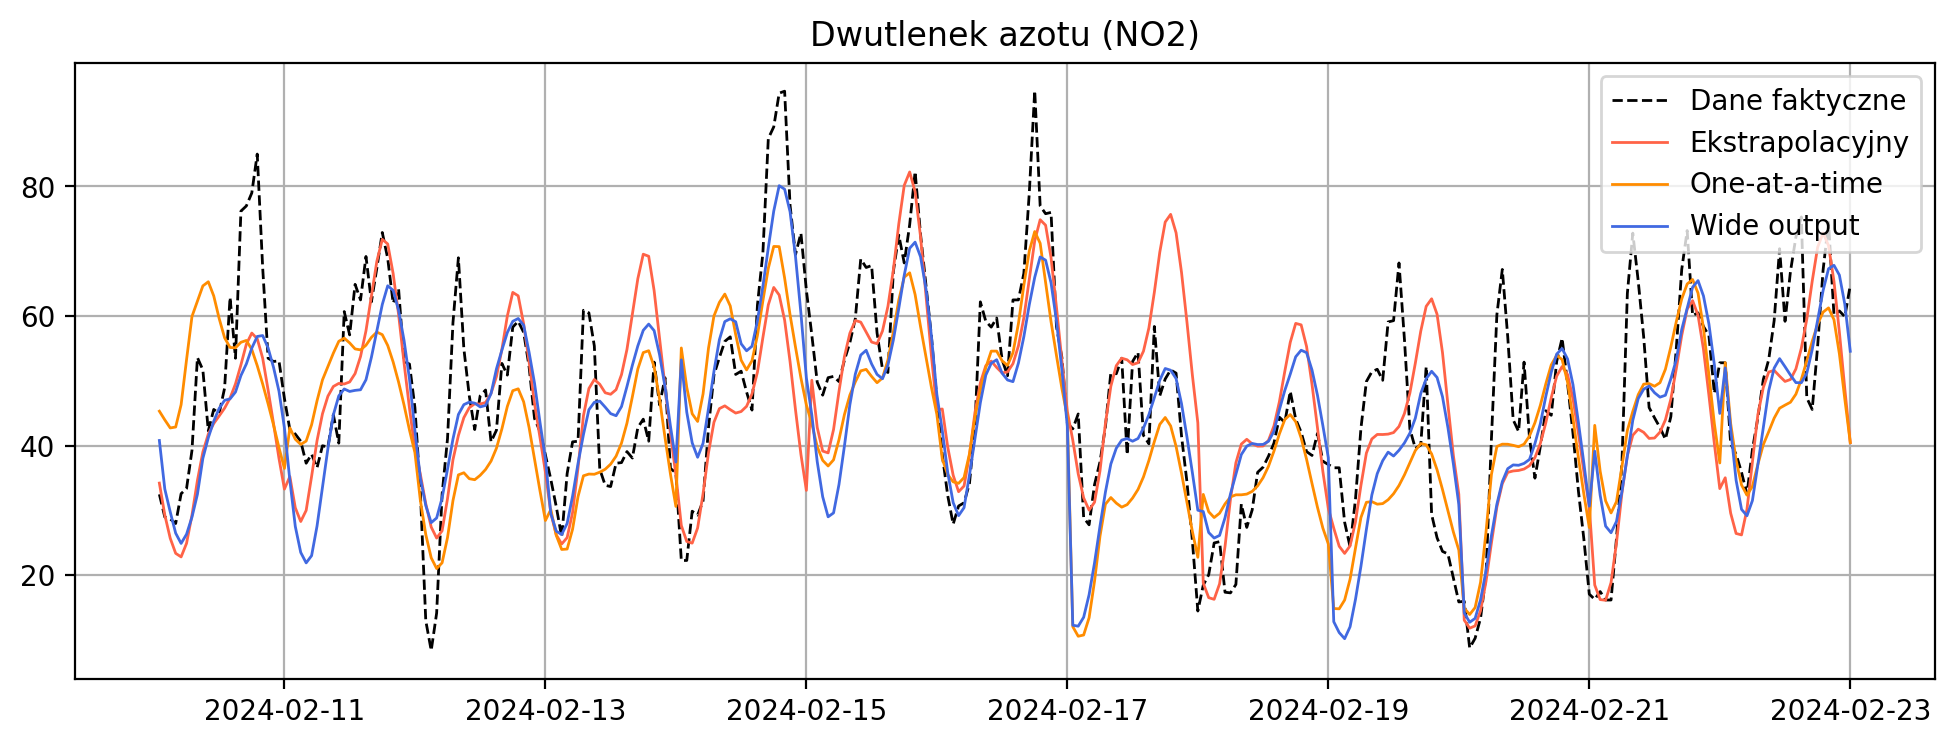

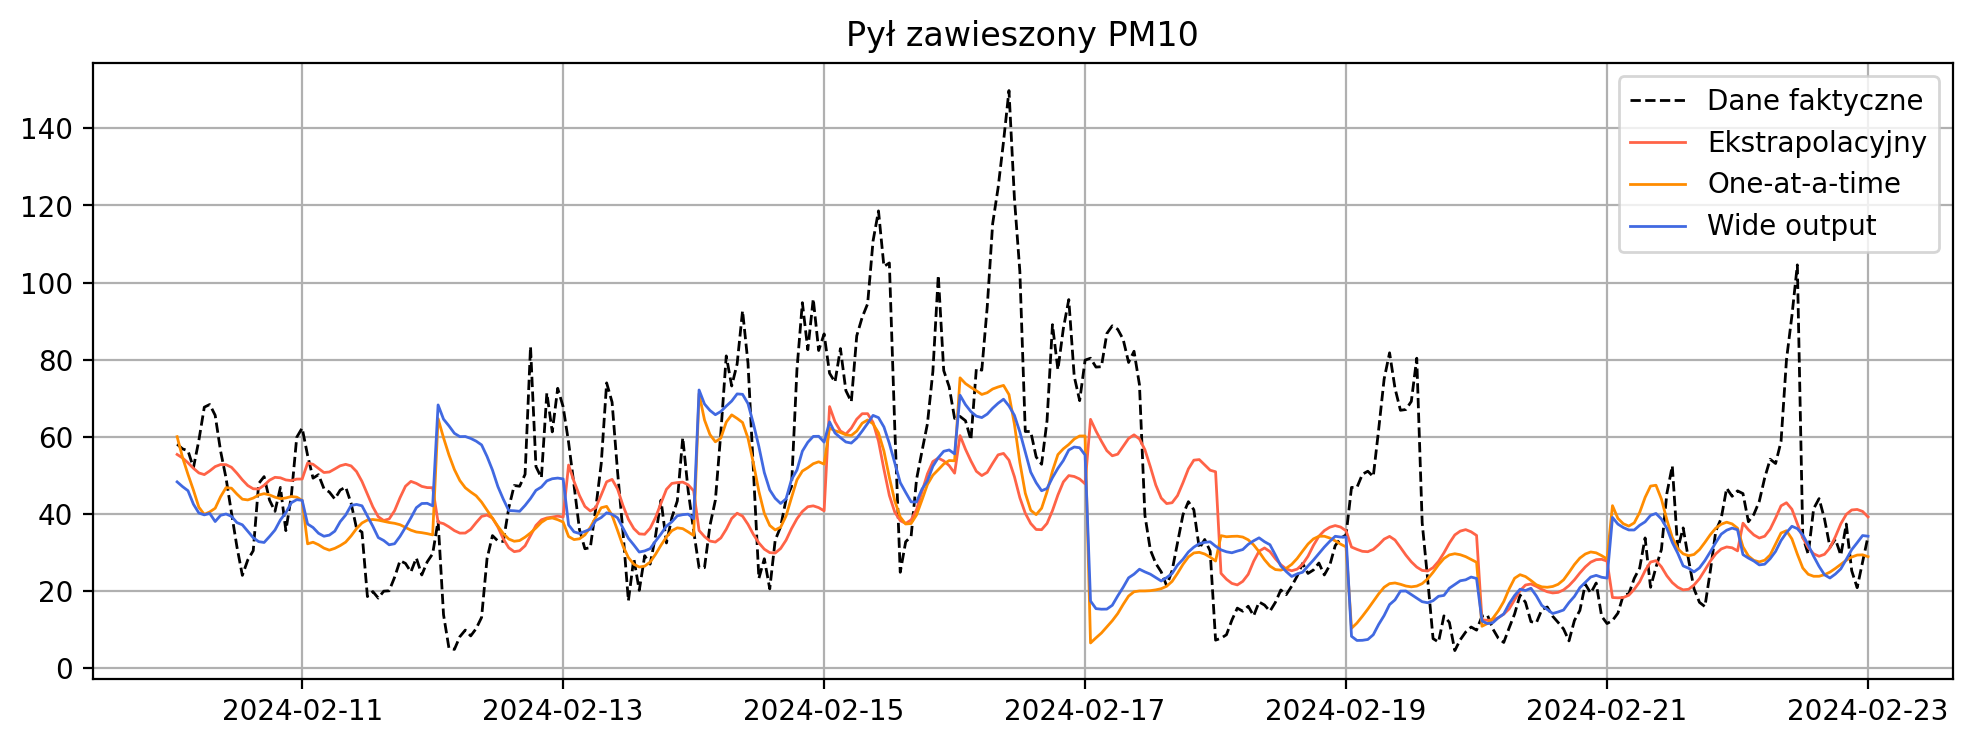

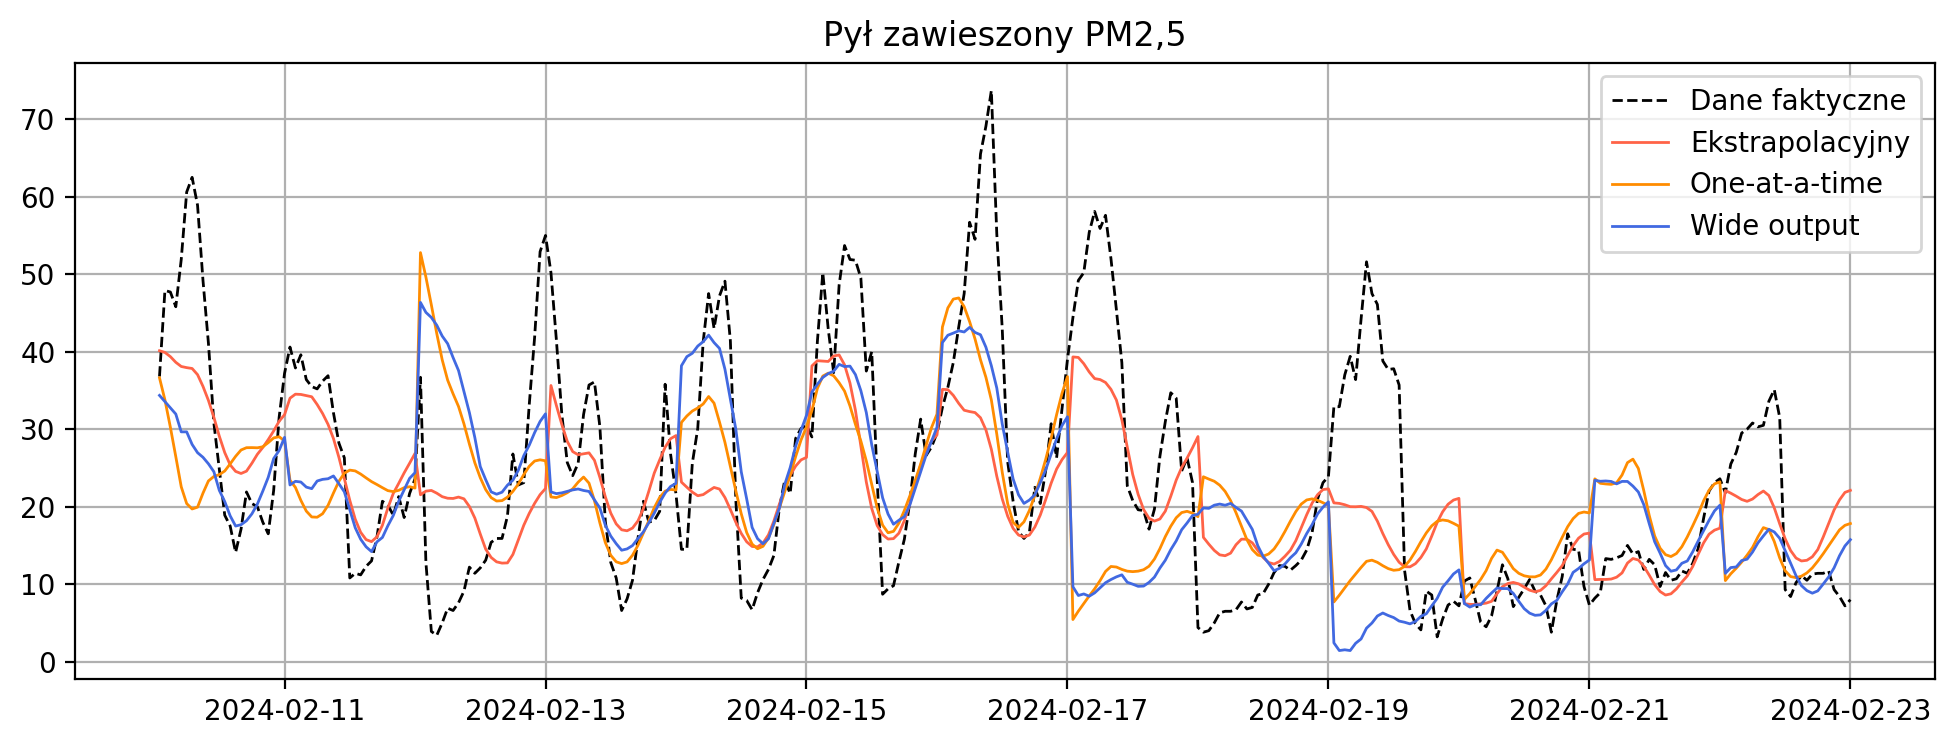

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

filenames = [
    'true_valid',
    'ext_valid', 
    'one_valid', 
    'wide_valid']
labels = [
    'Dane faktyczne',
    'Ekstrapolacyjny', 
    'One-at-a-time', 
    'Wide output']
colors = [
    'black',
    'tomato', 
    'darkorange', 
    'royalblue']
linestyles = [
    '--',
    '-',
    '-',
    '-'
]
linewidths = [
    1,
    1,
    1,
    1
]
column_names = [
    'Benzen', 
    'Tlenek węgla (CO)', 
    'Tlenki azotu', 
    'Tlenek azotu (NO)', 
    'Dwutlenek azotu (NO2)', 
    'Pył zawieszony PM10', 
    'Pył zawieszony PM2,5']
dataframes = [pd.read_csv(filename, sep = ',', parse_dates = [0]) for filename in filenames]

time_start, time_end = 3 * 24, 16 * 24
figure_size = 12, 4
dpi = 200
output_dir = 'images'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

for i, column_name in enumerate(column_names, start = 1):
    plt.figure(figsize = figure_size, dpi = dpi)
    for df, label, color, linestyle, linewidth in zip(dataframes, labels, colors, linestyles, linewidths):
        timestamps = df.iloc[:, 0].to_numpy()[time_start:time_end]
        series = df.iloc[:, i].to_numpy()[time_start:time_end]
        plt.plot(timestamps, series, linestyle, label = label, color = color, linewidth = linewidth)

    plt.title(column_name)
    legend = plt.legend(loc = 'upper right')
    plt.grid()
    plt.xticks(rotation = 0)
    plt.savefig(f'images/{column_name}.png', bbox_inches = 'tight')